In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pickle
(mnist,_),(_,_) = keras.datasets.mnist.load_data() # (60000, 28, 28)

x = mnist[0]; plt.imshow(x); plt.show()

Using TensorFlow backend.


<Figure size 640x480 with 1 Axes>

In [2]:
directions = [[-1,0],[0,1],[1,0],[0,-1]] # ↑, →, ↓, ←
d_char = ["↑", "→", "↓", "←"]

def check(x, p, d_now, d):
    d_next = (d_now+d)%4 # turn right d times
    d = directions[d_next]
    _p = [p[0]+d[0], p[1]+d[1]]
    return x[tuple(_p)]

def move(p, d_now, d):
    d_next = (d_now+d)%4
    d = directions[d_next]    
    p = [p[0]+d[0], p[1]+d[1]]
    return p, d_next

def make_contour(x, DEMO=False):
    x = x/255
    x = np.where(x<0.01, 0,1)
    x = np.pad(x,[(1,1),(1,1)],"constant")

    while True:
        change = 0
        _x = x
        for i in range(1,29):
            for j in range(1,29):
                if x[i,j] == 1 and x[i-1,j] + x[i+1,j] + x[i,j-1] + x[i,j+1] == 1:
                    _x[i, j] = 0
                    change += 1
        x = _x
        if change == 0: break

    if DEMO:
        print(x.shape); plt.imshow(x); plt.show()

    p = None
    for i in range(1,29):
        for j in range(1,29):
            if x[i,j] == 1:
                p = [i,j]
                break
            if not type(p) == type(None): break
        if not type(p) == type(None): break

    d_temp = 0
    for d in range(4):
        if check(x, p, d_temp, d) == 0:
            # 壁に向かって右側が前。
            d_now = (d+1)%4
            break

    if DEMO:
        print("initial position:", p)
        print("initial direction:", d_char[d_now])
    
    v = [p] # vertices

    """
    - 常に左手（globalな向きに注意）を壁につける
    - 左は常に開いてない。
    - 前が開いてたら前。
    - 前が開いてなかったら右。
    - 前処理をしているので左、右、前が詰まっていることはない。
    """
    while True:
        # check left
        if check(x, p, d_now, 3) == 1:
            p, d_now = move(p, d_now, 3)
        # check forward
        elif check(x, p, d_now, 0) == 1:
            p, d_now = move(p, d_now, 0)
        # check right
        elif check(x, p, d_now, 1) == 1:
            p, d_now = move(p, d_now, 1)
        else:
            raise "unexpected"
        v.append(p)
        if p == v[0]:
            break
    if DEMO:
        plt.figure(figsize=(3,3))
        for i in range(len(v)-1):
            plt.plot([v[i][1],v[i+1][1]] , [-v[i][0],-v[i+1][0]])
        plt.show()
    
    return v

(30, 30)


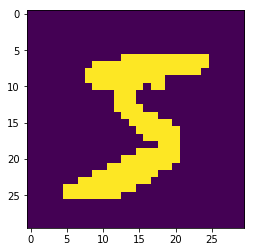

initial position: [6, 13]
initial direction: →


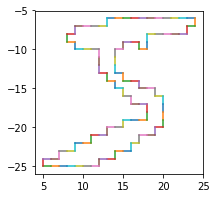

In [3]:
v = make_contour(mnist[0], DEMO=True)

In [4]:
for i in range(10):
    v = make_contour(mnist[i], DEMO=False)
    with open('data/sample_contour/mnist' + str(i) + '.pkl', mode='wb') as f:
        pickle.dump(v, f)